<a href="https://colab.research.google.com/github/ABHI20-STAT/Mathematical-Analysis-From-Real-to-Complex-/blob/main/Level_Sets_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Computational Guide (Definition → Lemma → Theorem → Proof)**

### **Setting and Notation**
Let $U\subseteq \mathbb{R}^n$. We consider real-valued functions $f:U\to \mathbb{R}.$ Write a point of $\mathbb{R}^{n+1}\cong \mathbb{R}^n\times\mathbb{R}$ as $(x,y)$, where $x\in\mathbb{R}^n$ and $y\in\mathbb{R}$.

### **Definition 1 (Graph of a Function)**
Let $f:U\to\mathbb{R}$. The **graph** of $f$ is the subset of $\mathbb{R}^{n+1}$ defined by
$$
\operatorname{graph}(f)\;:=\;\{(x,f(x))\in \mathbb{R}^n\times\mathbb{R}:\ x\in U\}.
$$
Equivalently,
$$
(x,y)\in \operatorname{graph}(f)\quad \Longleftrightarrow\quad x\in U\ \text{ and }\ y=f(x).
$$


### **Definition 2 (Fiber of a set $G\subseteq U\times\mathbb{R}$)**
Let $G\subseteq U\times\mathbb{R}$. For each $x\in U$, the **fiber** of $G$ above $x$ is,

$$G_x\;:=\;\{y\in\mathbb{R}:\ (x,y)\in G\}.$$

Thus, $G_x$ is the set of all output-values paired with the input $x$ inside the set $G$.

### **Lemma 1: (Fibers of a Graph are Singletons)**
Let $f:U\to\mathbb{R}$ and put $G=\operatorname{graph}(f)$. Then $\forall\; x\in U, G_x=\{f(x)\}.$

**Proof:**
By definition,
$$
G_x=\{y\in\mathbb{R}:\ (x,y)\in \operatorname{graph}(f)\}.
$$
But $(x,y)\in \operatorname{graph}(f)$ holds exactly when $y=f(x)$. Hence $G_x=\{f(x)\}$, which is a singleton.    $\;\square$

### **Lemma 2: (A Graph Determines its Function Uniquely)**
If \(f,g:U\to\mathbb{R}\) and \(\operatorname{graph}(f)=\operatorname{graph}(g)\), then \(f=g\) on \(U\).

**Proof:**
Fix $x\in U$. Then

$$(x,f(x))\in \operatorname{graph}(f)=\operatorname{graph}(g)$$.

By the definition of $\operatorname{graph}(g)$, the only point of the form

$$(x,\cdot) \in \operatorname{graph}(g)$$ is

$(x,g(x))$. Therefore $f(x)=g(x)$. Since $x$ was arbitrary, $f=g$. $\square$


## **Theorem: Exact Characterization: When is a Set a Graph?**

Let $U\subseteq\mathbb{R}^n$ and let $G\subseteq U\times\mathbb{R}$.  
$\therefore  \exists \; \textbf{a function}\; f:U\to\mathbb{R}:$
$$
G=\operatorname{graph}(f) \iff \; \forall x\in U\ \exists!\,y\in\mathbb{R}\ \text{such that}\ (x,y)\in G.
$$

Equivalently, $G=\operatorname{graph}(f)$ for some $f$ **iff** every fiber $G_x$ is a singleton.

**Proof:**

**($\Rightarrow$)** Suppose $G=\operatorname{graph}(f)$ for some $f:U\to\mathbb{R}$.

Fix $x\in U$. By **Lemma 1**, the fiber $G_x=\{f(x)\}$ contains exactly one element. Hence there exists a unique $y$ (namely $y=f(x)$) with $(x,y)\in G$.

This proves the condition
\(\forall x\in U\,\exists!\,y\) with \((x,y)\in G\).

**($\Leftarrow$)** Conversely, assume

$$\forall x\in U\ \exists!\,y\in\mathbb{R}\ \text{such that}\ (x,y)\in G.$$

Define a function $f:U\to\mathbb{R}$ by setting $f(x)$ to be that unique real number $y$ for which $(x,y)\in G$. This is well-defined because of uniqueness.

Now prove $G=\operatorname{graph}(f)$:

- If $(x,y)\in G$, then $y\in G_x$. But $G_x=\{f(x)\}$ (by the definition of $f$, so $y=f(x)$, hence $(x,y)\in \operatorname{graph}(f)$. Therefore, $G\subseteq \operatorname{graph}(f)$.

- If $(x,f(x)\in \operatorname{graph}(f)$, then by definition of $f(x)$ we have $(x,f(x))\in G$. Therefore $\operatorname{graph}(f)\subseteq G$.

Thus, $G=\operatorname{graph}(f)$. $\square$

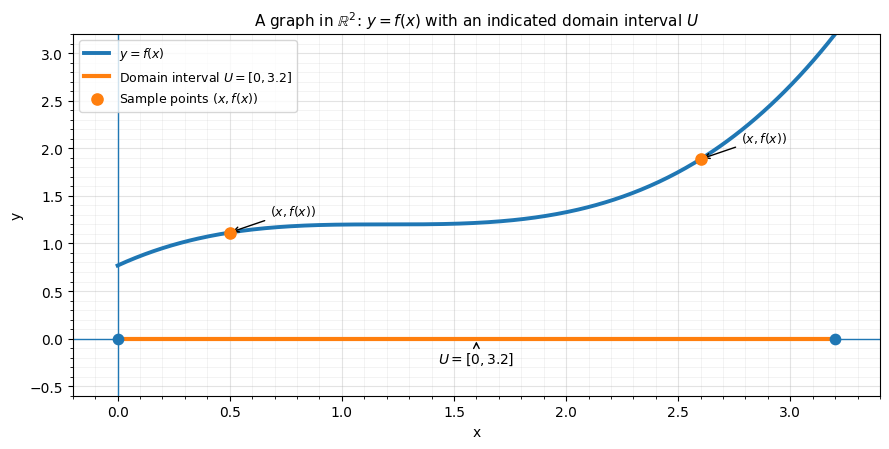

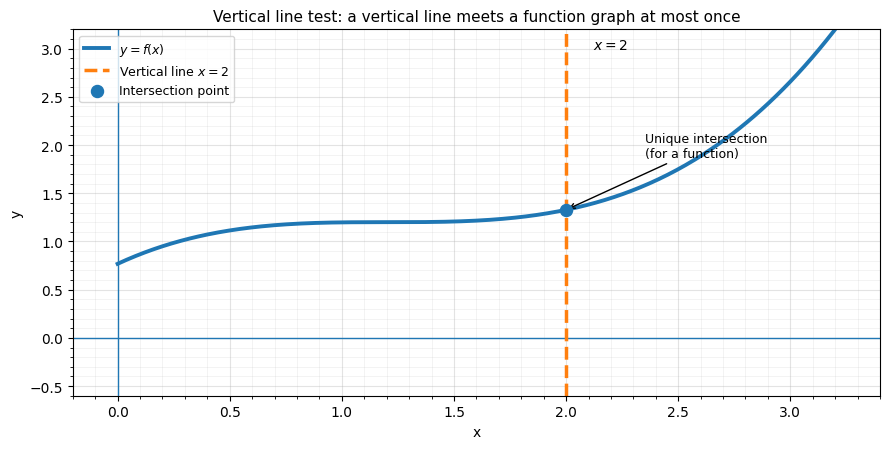

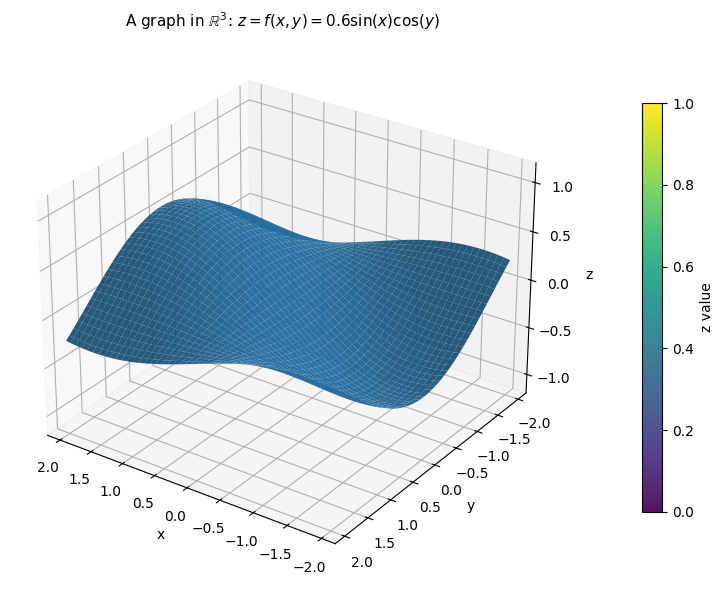

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Function definitions
# -----------------------------
def f1(x: np.ndarray) -> np.ndarray:
    """One-variable function used in plots (i) and (ii)."""
    return 0.25 * (x - 1.2)**3 + 1.2

def f2(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Two-variable function used in plot (iii): z = 0.6 sin(x) cos(y)."""
    return 0.6 * np.sin(x) * np.cos(y)

# -----------------------------
# Shared styling helpers
# -----------------------------
def _setup_2d_axes(ax, title: str, xlim, ylim):
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    # Grid: major + minor for readability
    ax.grid(True, which="major", linewidth=0.8, alpha=0.35)
    ax.minorticks_on()
    ax.grid(True, which="minor", linewidth=0.5, alpha=0.20)

    # Draw axes through origin (like "axis lines=middle")
    ax.axhline(0, linewidth=1.0)
    ax.axvline(0, linewidth=1.0)

# -----------------------------
# (i) One-variable graph with marked domain interval + sample points
# -----------------------------
def plot_one_variable_graph():
    # Domain and plotting range
    x_domain = np.linspace(0.0, 3.2, 400)
    y_domain = f1(x_domain)

    # Axis limits chosen to match the LaTeX idea
    xlim = (-0.2, 3.4)
    ylim = (-0.6, 3.2)

    fig, ax = plt.subplots(figsize=(9, 4.6))
    _setup_2d_axes(
        ax,
        title=r"A graph in $\mathbb{R}^2$: $y=f(x)$ with an indicated domain interval $U$",
        xlim=xlim, ylim=ylim
    )

    # Plot the curve
    ax.plot(x_domain, y_domain, linewidth=2.8, label=r"$y=f(x)$")

    # Mark the domain interval U on x-axis
    ax.plot([0.0, 3.2], [0.0, 0.0], linewidth=3.0, label=r"Domain interval $U=[0,3.2]$")
    ax.scatter([0.0, 3.2], [0.0, 0.0], s=55, zorder=5)

    # Label for U
    ax.annotate(
        r"$U=[0,3.2]$",
        xy=(1.6, 0.0),
        xytext=(1.6, -0.25),
        ha="center",
        arrowprops=dict(arrowstyle="->", linewidth=1.0),
        fontsize=10
    )

    # Sample points
    x_pts = np.array([0.5, 2.6])
    y_pts = f1(x_pts)
    ax.scatter(x_pts, y_pts, s=65, zorder=6, label=r"Sample points $(x,f(x))$")

    # Annotate the sample points
    for xp, yp in zip(x_pts, y_pts):
        ax.annotate(
            r"$(x,f(x))$",
            xy=(xp, yp),
            xytext=(xp + 0.18, yp + 0.18),
            arrowprops=dict(arrowstyle="->", linewidth=1.0),
            fontsize=9
        )

    ax.legend(loc="upper left", fontsize=9, frameon=True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# (ii) Vertical line test illustration (x = 2)
# -----------------------------
def plot_vertical_line_test():
    x_domain = np.linspace(0.0, 3.2, 400)
    y_domain = f1(x_domain)

    xlim = (-0.2, 3.4)
    ylim = (-0.6, 3.2)

    fig, ax = plt.subplots(figsize=(9, 4.6))
    _setup_2d_axes(
        ax,
        title="Vertical line test: a vertical line meets a function graph at most once",
        xlim=xlim, ylim=ylim
    )

    # Curve
    ax.plot(x_domain, y_domain, linewidth=2.8, label=r"$y=f(x)$")

    # Vertical line x = 2
    x0 = 2.0
    ax.plot([x0, x0], [ylim[0], ylim[1]], linewidth=2.5, linestyle="--", label=r"Vertical line $x=2$")

    # Intersection point
    y0 = float(f1(np.array([x0]))[0])
    ax.scatter([x0], [y0], s=75, zorder=6, label="Intersection point")

    # Annotations
    ax.annotate(
        r"$x=2$",
        xy=(x0, ylim[1] - 0.1),
        xytext=(x0 + 0.12, ylim[1] - 0.2),
        fontsize=10
    )

    ax.annotate(
        "Unique intersection\n(for a function)",
        xy=(x0, y0),
        xytext=(x0 + 0.35, y0 + 0.55),
        arrowprops=dict(arrowstyle="->", linewidth=1.0),
        fontsize=9
    )

    ax.legend(loc="upper left", fontsize=9, frameon=True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# (iii) Two-variable graph as a 3D surface
# -----------------------------
def plot_surface_graph():
    # Mesh domain
    x = np.linspace(-2.0, 2.0, 180)
    y = np.linspace(-2.0, 2.0, 180)
    X, Y = np.meshgrid(x, y)
    Z = f2(X, Y)

    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_title(r"A graph in $\mathbb{R}^3$: $z=f(x,y)=0.6\sin(x)\cos(y)$", fontsize=11)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    # Surface plot (no explicit colors chosen: matplotlib default colormap)
    surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, alpha=0.92)

    # Add a colorbar to help readers interpret height values
    cbar = fig.colorbar(surf, ax=ax, shrink=0.75, pad=0.10)
    cbar.set_label("z value", rotation=90)

    # Set a friendly view angle (similar spirit to pgfplots view)
    ax.view_init(elev=28, azim=125)

    # Improve readability: limit ranges
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-2.2, 2.2)
    ax.set_zlim(-1.2, 1.2)

    # Optional: show a light grid for depth cues (default usually fine)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Run all three visualizations
# -----------------------------
if __name__ == "__main__":
    plot_one_variable_graph()
    plot_vertical_line_test()
    plot_surface_graph()


## **Interpretation for The Code-Based Plots**

### **(A) One-variable plot $(n=1)$**
We choose $U=[0,3.2]\subset\mathbb{R}$ and define
$$
f(x)=\tfrac14(x-1.2)^3+1.2.
$$

The 2D plot visualizes the set $\operatorname{graph}(f)\subset\mathbb{R}^2$ by sampling points,

$$(x_i,f(x_i)) \; \text{for many}\; x_i\in U$$.

### **(B) Vertical Line Test (Fiber Viewpoint)**
For $n=1$, the “vertical line at $x=a$” corresponds to fixing $x=a$ and inspecting the fiber
$$
(\operatorname{graph}(f))_a=\{f(a)\},
$$
which is a singleton by **Lemma 1**. The plotted line $x=2$ meets the graph at the unique point $(2,f(2))$.

### **(C) Two-variable surface $(n=2)$**
Let $U=[-2,2]\times[-2,2]\subset\mathbb{R}^2$ and define
$$
f(x,y)=0.6\sin(x)\cos(y).
$$
The 3D plot visualizes $\operatorname{graph}(f)\subset\mathbb{R}^3$ by sampling a grid $(x_i,y_j)\in U$ and plotting the points
$$
(x_i,y_j,f(x_i,y_j)).
$$
> **The theorem implies:** For each fixed $(x,y)\in U$, there exists a unique height $z=f(x,y)$, so the surface is indeed a graph.


## **Contour Maps (level curves) for a Height function — Mathematical Theory**

### **1. Height Functions and Their Graphs**
Let $U\subseteq \mathbb{R}^2$ be a domain and let

$$h:U\to \mathbb{R},\qquad (x,y)\mapsto h(x,y)$$

be a real-valued function of two variables.

A standard geometric interpretation is that $h(x,y)$ gives the **height** above the $xy$-plane at the point $(x,y)$. The **graph** of $h$ is the surface in $\mathbb{R}^3$

$$
\operatorname{graph}(h)=\{(x,y,z)\in\mathbb{R}^3:\ (x,y)\in U,\ z=h(x,y)\}.
$$

Equivalently,

$$
\operatorname{graph}(h)=\{(x,y,h(x,y)):\ (x,y)\in U\}.
$$

### **2. Level Sets and Level Curves**
For a constant $c\in\mathbb{R}$, the **level set** of $h$ at level $c$ is
$$
L_c(h)=\{(x,y)\in U:\ h(x,y)=c\}.
$$
When $n=2$, this set is typically a curve (or a union of curves) in the plane and is called a

- **Level Curve**, or  
- **Contour Line**.

So the equivalence
$$
h(x,y)=c \quad\Longleftrightarrow\quad (x,y)\in L_c(h)
$$
**Simply means:** The points on the contour line are precisely the points where the height equals $c$.

### **3. Contour Maps and The Topographic Analogy**

A **contour map** is obtained by plotting several level curves for different constants $c_1,c_2,\dots,c_k$:

$$ L_{c_1}(h),\ L_{c_2}(h),\ \dots,\ L_{c_k}(h).$$

>This is mathematically analogous to topographic maps:
> - Walking along a single contour $L_c(h)$ keeps the height constant (since $h(x,y)=c$) along that path),
> - Nested contours correspond to rising (or falling) height as \(c\) increases (or decreases).

### **4. Link Between the Surface and Its Contours**
The surface $\operatorname{graph}(h)\subset\mathbb{R}^3$ can be intersected with a horizontal plane $z=c.$ The intersection is

$$
\operatorname{graph}(h)\cap\{z=c\}
=\{(x,y,c): (x,y)\in U,\ h(x,y)=c\}.
$$

Projecting this intersection down to the $xy$-plane (dropping the $z$-coordinate) gives exactly the level curve $L_c(h)$.  

> Hence, **level curves are the planar shadows of horizontal slices of the surface**.

### **5. The Specific Mathematical Example used in the Code**

We model a “hill” by a height function $h:U\subset\mathbb{R}^2\to\mathbb{R}$.  
Its graph is the surface

$$
\operatorname{graph}(h)=\{(x,y,z)\in\mathbb{R}^3:\ z=h(x,y)\}.
$$
For each constant $c\in\mathbb{R}$, the **level curve** (contour line) is

$$
L_c(h)=\{(x,y)\in U:\ h(x,y)=c\}.
$$

Geometrically, $L_c(h)$ is the projection onto the $xy$-plane of the horizontal slice
$$
\operatorname{graph}(h)\cap\{z=c\}.
$$

In the code below we use an anisotropic Gaussian hill:

$$
h(x,y)=220\exp\!\left(-\Big(\frac{x}{2.1}\Big)^2-\Big(\frac{y}{1.4}\Big)^2\right),
$$
Properties (purely mathematical):
-  $h(x,y)>0 \; \forall (x,y)$.
-  The maximum occurs at $(0,0)$, where $h(0,0)=220$.
-  As $\sqrt{x^2+y^2} \to\infty$, the exponential term tends to $0$, so $h(x,y)\to 0$.
- The level curves $h(x,y)=c \; \text {for}\; c\in (0,220)$ form nested closed curves (ellipses, in this case).

> We visualize the level curves for the constants $c\in\{50,100,150,200\},$ i.e., we visualize the contours for $c\in\{50,100,150,200\}$.

- **Panel (a) (Left):** Plots the surface $z=h(x,y) \in \mathbb{R}^3$, and also draws the level curves $h(x,y)=c$ projected onto a plane below (a visual “shadow contour map”).

- **Panel (b) (Right):** Plots the contour map in the $xy$-plane: the curves $L_c(h)$ for $c=50,100,150,200$, each labelled by its height value.

> In both views, the mathematics is the same: each contour is the set of all $(x,y)$ satisfying the equation $h(x,y)=c$.


In [ ]:
# If needed in Colab:
# !pip -q install plotly

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Height function (a smooth "hill")
# h(x,y) = 220 * exp(-(x/2.1)^2 - (y/1.4)^2)
# -----------------------------
def h(x, y):
    return 220.0 * np.exp(-((x/2.1)**2 + (y/1.4)**2))

# Domain grid
x = np.linspace(-3.0, 3.0, 300)
y = np.linspace(-2.6, 2.6, 240)
X, Y = np.meshgrid(x, y)
Z = h(X, Y)

# Contour levels to display
levels = [50, 100, 150, 200]

# -----------------------------
# Figure layout: 1 row, 2 columns
#   (a) 3D surface + contour projection
#   (b) 2D contour map (top view)
# -----------------------------
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scene"}, {"type": "xy"}]],
    subplot_titles=(
        "(a) Surface $z=h(x,y)$ with contour lines",
        "(b) Contour map (top view): level curves $h(x,y)=c$"
    )
)

# ---- (a) 3D surface with contour projections ----
surface = go.Surface(
    x=x, y=y, z=Z,
    opacity=0.95,
    showscale=True,
    colorbar=dict(title="z value"),
    contours=dict(
        z=dict(
            show=True,
            start=min(levels),
            end=max(levels),
            size=levels[1] - levels[0],
            project=dict(z=True),  # project contours onto the z plane
        )
    )
)
fig.add_trace(surface, row=1, col=1)

# ---- (b) 2D contour map ----
contour2d = go.Contour(
    x=x, y=y, z=Z,
    contours=dict(
        coloring="lines",
        showlabels=True,
        start=min(levels),
        end=max(levels),
        size=levels[1] - levels[0],
    ),
    line=dict(width=2),
    showscale=False
)
fig.add_trace(contour2d, row=1, col=2)

# -----------------------------
# Axes + aspect / view tuning
# -----------------------------
fig.update_scenes(
    dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
        xaxis=dict(range=[-3.0, 3.0]),
        yaxis=dict(range=[-2.6, 2.6]),
        zaxis=dict(range=[0.0, 240.0]),
        camera=dict(eye=dict(x=1.6, y=1.4, z=0.8))  # readable default view
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="x", row=1, col=2)
fig.update_yaxes(title_text="y", row=1, col=2, scaleanchor="x", scaleratio=1)

fig.update_layout(
    height=520,
    width=1100,
    margin=dict(l=10, r=10, t=60, b=10)
)

fig.show()


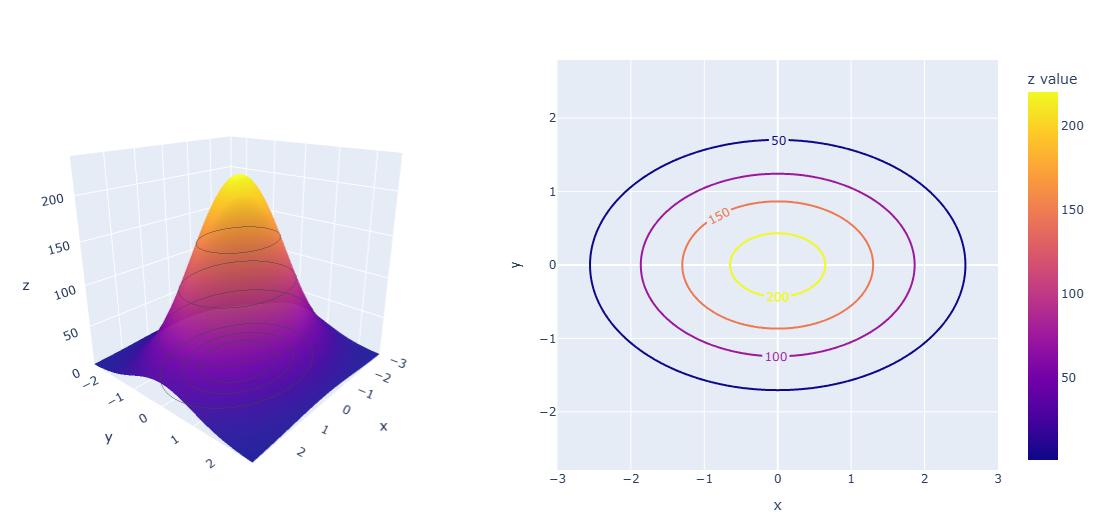

## **Level Curves of $f(x,y)=x+y+2$ And Their Relation to The Graph $z=x+y+2$**

### **1. The Function and Its Graph**
Let
$$
f:\mathbb{R}^2\to\mathbb{R},\qquad f(x,y)=x+y+2.
$$
Its **graph** is the subset of $\mathbb{R}^3$
$$
\operatorname{graph}(f)=\{(x,y,z)\in\mathbb{R}^3:\ z=f(x,y)\}
=\{(x,y,z): z=x+y+2\}.
$$
Hence the graph is a **plane** in $\mathbb{R}^3$.

### **2. Level Curves in The $xy$-Plane**

For a constant $c\in\mathbb{R}$, the **level curve** (level set in $\mathbb{R}^2$) is,

$$
L_c=\{(x,y)\in\mathbb{R}^2:\ f(x,y)=c\}.
$$

Substituting $f(x,y)=x+y+2$, we get

$$
x+y+2=c \quad\Longleftrightarrow\quad y=-x+(c-2).
$$

Therefore, each level curve $L_c$ is a straight line with slope $-1$. Different values of $c$ produce a family of **parallel** lines.


### **3. “Lifting” Level Curves to The Surface (The Key Geometric Relationship)**

Consider the horizontal plane at height $c$:

$$
H_c:=\{(x,y,z)\in\mathbb{R}^3:\ z=c\}.
$$

Intersecting the graph plane $z=x+y+2$ with $H_c$ gives:

$$ z=x+y+2 \ \text{and}\ z=c \quad\Longleftrightarrow\quad x+y+2=c.$$

So the intersection set is
$$
\operatorname{graph}(f)\cap H_c
=
\{(x,y,c): x+y+2=c\}.
$$

> This is a line in $\mathbb{R}^3$ lying on the plane $z=x+y+2$ at the constant height $z=c$. These are exactly the level curves lifted to the surface.



### **4. Projection Back to The $xy$-Plane**

Let $\pi:\mathbb{R}^3\to\mathbb{R}^2$ be the projection $\pi(x,y,z)=(x,y)$. Then
$$
\pi\big(\operatorname{graph}(f)\cap H_c\big)
=
\{(x,y): x+y+2=c\}=L_c.
$$
So:

> - **Level curves in the \(xy\)-plane are projections of horizontal slices of the surface.**  
> - **Lifted level curves on the surface are intersections with planes \(z=c\).**

This is exactly the figure illustrates.


In [ ]:
# If needed in Colab:
# !pip -q install plotly

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Function: f(x,y) = x + y + 2
# -----------------------------
def f(x, y):
    return x + y + 2

# Domain box (textbook feel)
x_min, x_max = -3, 3
y_min, y_max = -3, 3

# Level values (as in the figure)
levels = [0, 2, 4]

# -----------------------------
# Helper: line segment of x+y+2=c inside the rectangle
# -----------------------------
def level_segment_endpoints(c, x_min, x_max, y_min, y_max):
    # Line: x + y + 2 = c  ->  y = -x + (c-2)
    b = c - 2
    candidates = []

    # x = x_min, x_max
    y_at_xmin = -x_min + b
    if y_min <= y_at_xmin <= y_max:
        candidates.append((x_min, y_at_xmin))
    y_at_xmax = -x_max + b
    if y_min <= y_at_xmax <= y_max:
        candidates.append((x_max, y_at_xmax))

    # y = y_min, y_max
    x_at_ymin = b - y_min
    if x_min <= x_at_ymin <= x_max:
        candidates.append((x_at_ymin, y_min))
    x_at_ymax = b - y_max
    if x_min <= x_at_ymax <= x_max:
        candidates.append((x_at_ymax, y_max))

    # unique points (avoid duplicates when line hits a corner)
    uniq = []
    for p in candidates:
        if all((p[0]-q[0])**2 + (p[1]-q[1])**2 > 1e-12 for q in uniq):
            uniq.append(p)

    if len(uniq) < 2:
        return None

    # pick the farthest pair (gives the full segment across the box)
    best = (uniq[0], uniq[1])
    best_d = -1
    for i in range(len(uniq)):
        for j in range(i+1, len(uniq)):
            d = (uniq[i][0]-uniq[j][0])**2 + (uniq[i][1]-uniq[j][1])**2
            if d > best_d:
                best_d = d
                best = (uniq[i], uniq[j])
    return best

# -----------------------------
# Build subplot: 2D (left) + 3D (right)
# -----------------------------
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type":"xy"}, {"type":"scene"}]],
    column_widths=[0.42, 0.58],

)

# =========================================================
# (A) 2D PANEL: level curves (parallel lines) + labels
# =========================================================
for c in levels:
    seg = level_segment_endpoints(c, x_min, x_max, y_min, y_max)
    if seg is None:
        continue
    (x1, y1), (x2, y2) = seg

    # line
    fig.add_trace(
        go.Scatter(
            x=[x1, x2], y=[y1, y2],
            mode="lines",
            line=dict(width=4, color="#1f77b4"),
            showlegend=False
        ),
        row=1, col=1
    )

    # label (placed near midpoint)
    xm, ym = (x1 + x2)/2, (y1 + y2)/2
    fig.add_trace(
        go.Scatter(
            x=[xm], y=[ym],
            mode="text",
            text=[rf"$f(x,y)=x+y+2={c}$"],
            textposition="top center",
            showlegend=False
        ),
        row=1, col=1
    )

# 2D axis formatting
fig.update_xaxes(range=[x_min, x_max], title_text="x", row=1, col=1, zeroline=True)
fig.update_yaxes(range=[y_min, y_max], title_text="y", row=1, col=1, zeroline=True,
                 scaleanchor="x", scaleratio=1)

# =========================================================
# (B) 3D PANEL: xy-plane + plane z=x+y+2 + lifted contours
# =========================================================

# Plane grid for the surface
xg = np.linspace(x_min, x_max, 60)
yg = np.linspace(y_min, y_max, 60)
XG, YG = np.meshgrid(xg, yg)
ZG = f(XG, YG)

# xy-plane z=0
fig.add_trace(
    go.Surface(
        x=xg, y=yg, z=np.zeros_like(ZG),
        opacity=0.15,
        showscale=False,
        hoverinfo="skip"
    ),
    row=1, col=2
)

# graph plane z=x+y+2
fig.add_trace(
    go.Surface(
        x=xg, y=yg, z=ZG,
        opacity=0.35,
        showscale=False,
        hoverinfo="skip"
    ),
    row=1, col=2
)

# 3D axes as bold lines + arrowheads (cones)
axis_len = 3.4

# x-axis
fig.add_trace(go.Scatter3d(
    x=[-axis_len, axis_len], y=[0, 0], z=[0, 0],
    mode="lines", line=dict(width=6, color="black"),
    showlegend=False
),
    row=1, col=2
)
fig.add_trace(go.Cone(
    x=[axis_len], y=[0], z=[0],
    u=[0.6], v=[0], w=[0],
    showscale=False, sizemode="absolute", sizeref=0.35,
    colorscale=[[0,"black"],[1,"black"]]
),
    row=1, col=2
)

# y-axis
fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[-axis_len, axis_len], z=[0, 0],
    mode="lines", line=dict(width=6, color="black"),
    showlegend=False
),
    row=1, col=2
)
fig.add_trace(go.Cone(
    x=[0], y=[axis_len], z=[0],
    u=[0], v=[0.6], w=[0],
    showscale=False, sizemode="absolute", sizeref=0.35,
    colorscale=[[0,"black"],[1,"black"]]
),
    row=1, col=2
)

# z-axis
fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, 0], z=[0, 7.0],
    mode="lines", line=dict(width=6, color="black"),
    showlegend=False
),
    row=1, col=2
)
fig.add_trace(go.Cone(
    x=[0], y=[0], z=[7.0],
    u=[0], v=[0], w=[0.7],
    showscale=False, sizemode="absolute", sizeref=0.35,
    colorscale=[[0,"black"],[1,"black"]]
),
    row=1, col=2
)

# Scene annotations (3D)
scene_annotations = [
    dict(x=axis_len+0.3, y=0, z=0, text="x", showarrow=False, font=dict(size=16, color="black")),
    dict(x=0, y=axis_len+0.3, z=0, text="y", showarrow=False, font=dict(size=16, color="black")),
    dict(x=0, y=0, z=7.3, text="z", showarrow=False, font=dict(size=16, color="black")),  # remove
    dict(x=-2.8, y=2.6, z=6.2, text=r"$z=x+y+2$", showarrow=False, font=dict(size=14, color="black")),
]

# Lifted level curves + projections + vertical “lift” lines
for c in levels:
    seg = level_segment_endpoints(c, x_min, x_max, y_min, y_max)
    if seg is None:
        continue
    (x1, y1), (x2, y2) = seg

    # lifted line at z=c on the plane
    fig.add_trace(
        go.Scatter3d(
            x=[x1, x2], y=[y1, y2], z=[c, c],
            mode="lines",
            line=dict(width=10, color="#1f77b4"),
            showlegend=False
        ),
        row=1, col=2
    )

    # projection to xy-plane (z=0)
    fig.add_trace(
        go.Scatter3d(
            x=[x1, x2], y=[y1, y2], z=[0, 0],
            mode="lines",
            line=dict(width=6, color="#1f77b4", dash="dash"),
            showlegend=False
        ),
        row=1, col=2
    )

    # vertical dotted lift lines
    fig.add_trace(
        go.Scatter3d(
            x=[x1, x1], y=[y1, y1], z=[0, c],
            mode="lines",
            line=dict(width=4, color="black", dash="dot"),
            showlegend=False
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter3d(
            x=[x2, x2], y=[y2, y2], z=[0, c],
            mode="lines",
            line=dict(width=4, color="black", dash="dot"),
            showlegend=False
        ),
        row=1, col=2
    )

    # label each lifted curve
    xm, ym = (x1 + x2)/2, (y1 + y2)/2
    scene_annotations.append(
        dict(x=xm, y=ym, z=c + 0.15,
             text=rf"$x+y+2={c}$",
             showarrow=False, font=dict(size=14, color="black"))
    )

# “lifted” label
scene_annotations.append(
    dict(x=2.8, y=2.8, z=5.5,
         text="Level curves<br>lifted<br>to surface",
         showarrow=True, ax=-50, ay=-30,
         font=dict(size=13, color="black"), arrowhead=2)
)

# Apply 3D scene settings
fig.update_scenes(
    dict(
        #xaxis=dict(range=[-3.4, 3.4], showbackground=False, showgrid=False, zeroline=False, showticklabels=False),
        #yaxis=dict(range=[-3.4, 3.4], showbackground=False, showgrid=False, zeroline=False, showticklabels=False),
        #zaxis=dict(range=[0, 7.6],  showbackground=False, showgrid=False, zeroline=False, showticklabels=False),
        aspectmode="manual",
        aspectratio=dict(x=1.2, y=1.2, z=0.9),
        camera=dict(eye=dict(x=1.55, y=1.25, z=0.85)),
        annotations=scene_annotations
    ),
    row=1, col=2
)

# Global layout
fig.update_layout(
    height=680,
    width=1250,
    margin=dict(l=10, r=10, t=80, b=10),
    paper_bgcolor="white"
)

fig.show()

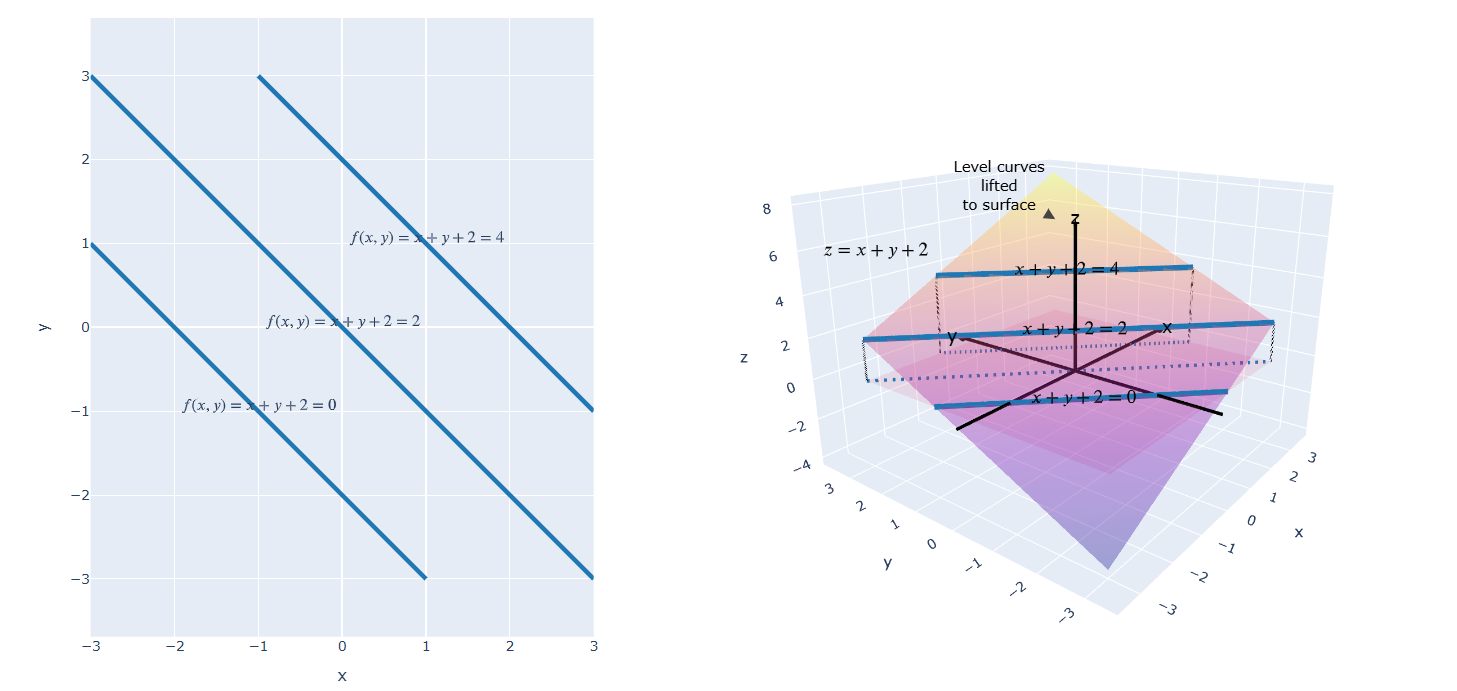

# **Level Curves for $f(x,y)$**

We dedine the function,

$$f(x,y) = x^2 + y^2$$

This notebook reproduces (in Python) the two figures:

1. **2D Contour Picture**: The level curves $x^2+y^2=c$ for $c=1,4,9,16$, i.e. circles of radius $1,2,3,4$, with axis arrows, tick marks, right-side labels, and leader lines.

2. **3D Lifting Picture**: The surface $z=x^2+y^2$ (a paraboloid), the $xy$-plane, the same circles **lifted** to heights $z=c$, their projections on $z=0$, height marks on the $z$-axis, and right-side labels with leader lines.

## **Mathematics Behind the Plots**

### **1) Level Sets / Level Curves in $\mathbb{R}^2$**
Let
$$
f:\mathbb{R}^2\to\mathbb{R},\qquad f(x,y)=x^2+y^2.
$$
For a constant $c\in\mathbb{R}$, the **level set** (level curve, since $n=2$) is


$$
L_c(f)=\{(x,y)\in\mathbb{R}^2:\ f(x,y)=c\}=\{(x,y): x^2+y^2=c\}.
$$


- If $c<0$, then $L_c(f)=\varnothing$ since $x^2+y^2\ge 0$.
- If $c=0$, then $L_0(f)=\{(0,0)\}$.
- If $c>0$, then $x^2+y^2=c$ is a circle of radius $\sqrt{c}$ centered at the origin.

So the curves for $c=1,4,9,16$ are circles with radius $1,2,3,4$.

A convenient **parametric model** for each circle (radius $r>0$) is:

$$
x=r\cos\theta,\qquad y=r\sin\theta,\qquad \theta\in[0,2\pi].
$$

Then $x^2+y^2=r^2$, so the level value is $c=r^2$.

### 2) **Graph and Lifting Level Curves Into $\mathbb{R}^3$**
The **graph** of $f$ is the surface

$$
\operatorname{graph}(f)=\{(x,y,z)\in\mathbb{R}^3:\ z=f(x,y)\} =\{(x,y,z): z=x^2+y^2\}.
$$

This is the **upward-opening paraboloid**.

The “lifting” in the book picture comes from intersecting the surface with the horizontal plane $z=c$:
$$
z=x^2+y^2 \quad\text{and}\quad z=c
\quad\Longleftrightarrow\quad x^2+y^2=c.
$$

Thus,
$$
\operatorname{graph}(f)\cap\{z=c\}=\{(x,y,c): x^2+y^2=c\},
$$

which is a circle of radius $\sqrt{c}$ located at height $z=c$.

So the lifted circle at height $z=r^2$ has parametric form:
$$
(x,y,z)=(r\cos\theta,\ r\sin\theta,\ r^2).
$$

The dashed “projection” circle in the \(xy\)-plane is the same circle at \(z=0\):
$$
(x,y,z)=(r\cos\theta,\ r\sin\theta,\ 0).
$$



## How This Mathematics Becomes Python Code

- Choose radius $r\in\{1,2,3,4\}$ (so levels $c=r^2$).
- Sample $\theta$ on $[0,2\pi]$ to generate points on circles.
- For 2D: plot $(x(\theta),y(\theta))$ for each $r$.
- For 3D: plot $(x(\theta),y(\theta),z(\theta))$ with $z=r^2$ (lifted) and $z=0$ (projection).
- Add the paraboloid surface by meshing a grid in $(x,y)$ and computing $z=x^2+y^2$.

> Below: Two **separate** Python cells: one for the 2D figure and one for the 3D figure.


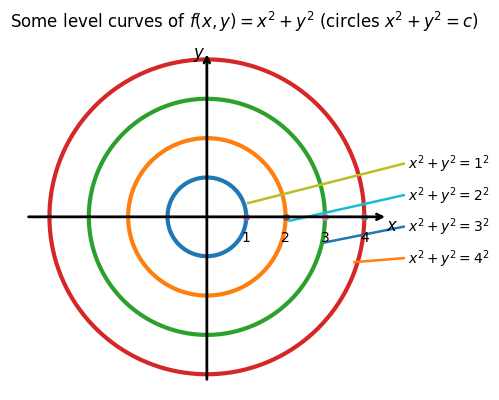

In [ ]:
# ==========================================================
# FIGURE 1 (2D): Level curves of f(x,y)=x^2+y^2 (book style)
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt

# radii and corresponding level values c=r^2
radii = [1, 2, 3, 4]

# parameter for circles
theta = np.linspace(0, 2*np.pi, 600)

fig, ax = plt.subplots(figsize=(8.2, 4.6))

# Axes with arrowheads (book-like)
ax.annotate("", xy=(4.6, 0), xytext=(-4.6, 0), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0, 4.2), xytext=(0, -4.2), arrowprops=dict(arrowstyle="->", lw=2))
ax.text(4.55, -0.35, r"$x$", fontsize=12)
ax.text(-0.35, 4.05, r"$y$", fontsize=12)

# Circles (level curves)
for r in radii:
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    ax.plot(x, y, lw=3)

# Tick labels on positive x-axis: 1,2,3,4 (with dots)
for r in radii:
    ax.plot([r], [0], marker="o", markersize=4)
    ax.text(r, -0.35, f"{r}", ha="center", va="top", fontsize=10)

# Right-side equations (placed to avoid overlap) + leader lines
# Use positions similar to TikZ
eq_positions = [(5.1,  1.35), (5.1, 0.55), (5.1, -0.25), (5.1, -1.05)]
leader_targets = [(1.05, 0.35), (2.10, -0.10), (3.00, -0.65), (3.75, -1.15)]

for r, (tx, ty), (px, py) in zip(radii, eq_positions, leader_targets):
    ax.text(tx, ty, rf"$x^2+y^2={r}^2$", fontsize=10, va="center")
    ax.plot([tx-0.1, px], [ty, py], lw=1.8)  # leader line

# Layout control (match TikZ bounding box)
ax.set_xlim(-4.8, 6.7)
ax.set_ylim(-4.4, 4.6)
ax.set_aspect("equal", adjustable="box")
ax.axis("off")

ax.set_title(r"Some level curves of $f(x,y)=x^2+y^2$ (circles $x^2+y^2=c$)", fontsize=12)
plt.show()


In [ ]:
# If needed in Colab:
# !pip -q install plotly

import numpy as np
import plotly.graph_objects as go

# -----------------------------
# Surface: z = x^2 + y^2
# -----------------------------
def paraboloid(x, y):
    return x**2 + y**2

# Domain for surface
x = np.linspace(-4, 4, 120)
y = np.linspace(-4, 4, 120)
X, Y = np.meshgrid(x, y)
Z = paraboloid(X, Y)

# Show only up to z=16-ish (book-style)
Z = np.where(Z <= 16.5, Z, np.nan)

# Levels: c = 1,4,9,16  (r = 1,2,3,4)
levels = [1, 4, 9, 16]
radii = [1, 2, 3, 4]

theta = np.linspace(0, 2*np.pi, 400)

fig = go.Figure()

# --- (1) Surface ---
fig.add_trace(go.Surface(
    x=x, y=y, z=Z,
    opacity=0.35,
    showscale=False,
    hoverinfo="skip",
    name="Surface: z = x² + y²"
))

# --- (2) xy-plane (z=0) ---
plane_size = 4.4
xp = np.array([[ -plane_size, plane_size], [ -plane_size, plane_size]])
yp = np.array([[ -plane_size, -plane_size], [ plane_size, plane_size]])
zp = np.zeros_like(xp)

fig.add_trace(go.Surface(
    x=xp, y=yp, z=zp,
    opacity=0.12,
    showscale=False,
    hoverinfo="skip",
    name="xy-plane (z=0)"
))

# --- (3) Lifted circles + projections (clean, hover-based labels) ---
for r, c in zip(radii, levels):
    xs = r*np.cos(theta)
    ys = r*np.sin(theta)

    # lifted at z=c
    fig.add_trace(go.Scatter3d(
        x=xs, y=ys, z=np.full_like(theta, c),
        mode="lines",
        line=dict(width=7),
        name=f"Lifted level: z = {c}",
        hovertemplate=(
            "Lifted level curve<br>"
            f"x² + y² = {c}<br>"
            f"z = {c}<extra></extra>"
        )
    ))

    # projection at z=0 (dashed)
    fig.add_trace(go.Scatter3d(
        x=xs, y=ys, z=np.zeros_like(theta),
        mode="lines",
        line=dict(width=4, dash="dash"),
        name=f"Projection (z=0), c={c}",
        hovertemplate=(
            "Projection on xy-plane<br>"
            f"x² + y² = {c}<br>"
            "z = 0<extra></extra>"
        ),
        showlegend=False  # keeps legend clean
    ))

# --- (4) Minimal, non-overlapping annotation ---
fig.add_annotation(
    x=0.83, y=0.62, xref="paper", yref="paper",
    text="Level curves lifted to surface",
    showarrow=False,
    font=dict(size=13)
)

# --- Scene / camera: readable default, no clutter ---
fig.update_layout(
    title="Level curves lifted to the surface  z = x² + y²",
    width=1000,
    height=650,
    margin=dict(l=10, r=10, t=70, b=10),
    scene=dict(
        xaxis=dict(title="x", range=[-4.6, 4.6], showbackground=False, showgrid=False, zeroline=False),
        yaxis=dict(title="y", range=[-4.6, 4.6], showbackground=False, showgrid=False, zeroline=False),
        zaxis=dict(title="z", range=[0, 17.5], showbackground=False, showgrid=False, zeroline=False),
        aspectmode="manual",
        aspectratio=dict(x=1.1, y=1.1, z=0.8),
        camera=dict(eye=dict(x=1.6, y=1.3, z=0.9))
    ),
    legend=dict(
        orientation="v",
        yanchor="top", y=0.98,
        xanchor="left", x=0.02,
        bgcolor="rgba(255,255,255,0.6)"
    )
)

fig.show()


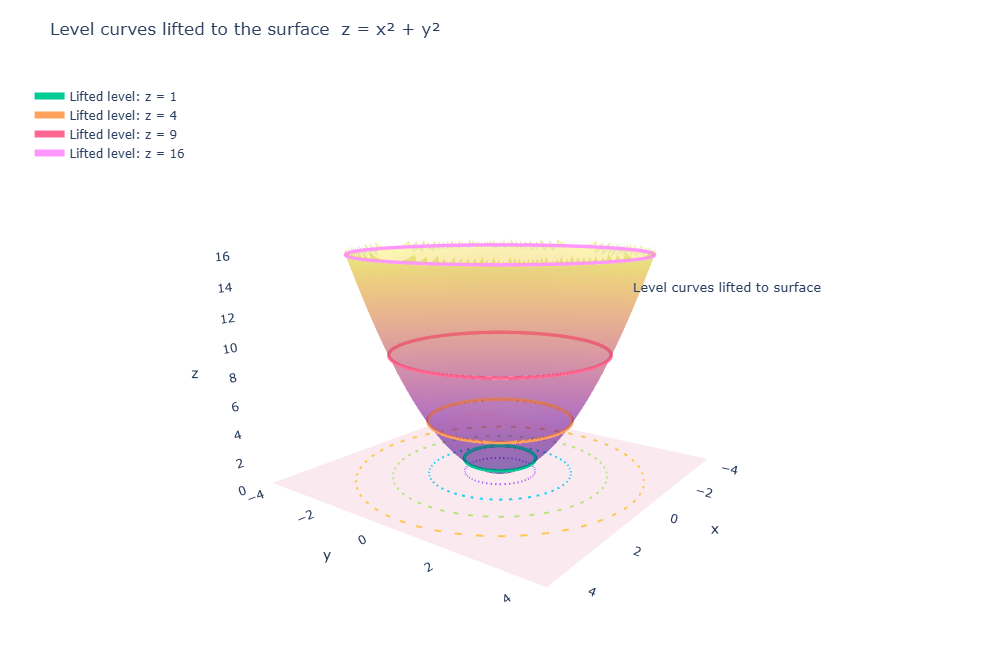

# **Plotly Creation for the Saddle Surface $z=x^2-y^2$**

The notebook below creates (with **Plotly**) the two figures:

1. **Contour map (level curves) of**  
   $$
   f(x,y)=x^2-y^2
   $$

   showing level sets $x^2-y^2=c$ for selected $c\in\{-4,-1,0,1,4\}$.

2. **Method of sections (3D)**: A 3D visualization of the surface $z=x^2-y^2$  together with two **vertical planes**

   $$
   y=0 \quad\text{and}\quad x=0
   $$

   and their intersection curves with the surface (the “sections”).

The main reason for using Plotly: you can rotate/zoom and use hover labels instead of stacking annotations.


In [ ]:
# If needed in Colab:
# !pip -q install plotly

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ============================================================
# Part 1: 2D contour map for x^2 - y^2 = c (clean plotly)
# ============================================================
def contour_hyperbola_traces(levels_pos=(1,4), levels_neg=(-1,-4), tmax=1.35, n=500):
    t = np.linspace(-tmax, tmax, n)
    traces = []

    # c=0 lines: y= x and y=-x
    xline = np.linspace(-3, 3, 2)
    traces.append(go.Scatter(
        x=xline, y=xline, mode="lines",
        line=dict(width=3, color="gray"),
        name="c=0: y=x",
        hovertemplate="x^2 - y^2 = 0 (y=x)<extra></extra>"
    ))
    traces.append(go.Scatter(
        x=xline, y=-xline, mode="lines",
        line=dict(width=3, color="gray"),
        name="c=0: y=-x",
        hovertemplate="x^2 - y^2 = 0 (y=-x)<extra></extra>"
    ))

    # c>0 branches (open in x): x = a cosh t, y = a sinh t
    for c in levels_pos:
        a = np.sqrt(c)
        x1 = a*np.cosh(t); y1 = a*np.sinh(t)
        x2 = -a*np.cosh(t); y2 = a*np.sinh(t)
        traces.append(go.Scatter(
            x=x1, y=y1, mode="lines",
            line=dict(width=4),
            name=f"c={c} (x-opening)",
            hovertemplate=f"x^2 - y^2 = {c}<extra></extra>"
        ))
        traces.append(go.Scatter(
            x=x2, y=y2, mode="lines",
            line=dict(width=4),
            showlegend=False,
            hovertemplate=f"x^2 - y^2 = {c}<extra></extra>"
        ))

    # c<0 branches (open in y): x = a sinh t, y = a cosh t and y = -a cosh t
    for c in levels_neg:
        a = np.sqrt(-c)
        x = a*np.sinh(t)
        ytop = a*np.cosh(t)
        ybot = -a*np.cosh(t)
        traces.append(go.Scatter(
            x=x, y=ytop, mode="lines",
            line=dict(width=4, dash="solid"),
            name=f"c={c} (y-opening)",
            hovertemplate=f"x^2 - y^2 = {c}<extra></extra>"
        ))
        traces.append(go.Scatter(
            x=x, y=ybot, mode="lines",
            line=dict(width=4, dash="solid"),
            showlegend=False,
            hovertemplate=f"x^2 - y^2 = {c}<extra></extra>"
        ))

    return traces

# ============================================================
# Part 2: 3D method of sections for z=x^2-y^2 (plotly)
# ============================================================
def saddle_surface_and_sections(xlim=2.6, ylim=2.6, n=80):
    x = np.linspace(-xlim, xlim, n)
    y = np.linspace(-ylim, ylim, n)
    X, Y = np.meshgrid(x, y)
    Z = X**2 - Y**2

    # surface
    surf = go.Surface(
        x=x, y=y, z=Z,
        opacity=0.45,
        showscale=False,
        name="surface z=x²-y²",
        hovertemplate="z = x² - y²<extra></extra>"
    )

    # planes y=0 and x=0 (vertical planes)
    zmin, zmax = -6, 6

    # plane y=0: (x,0,z)
    Xp = np.array([[-xlim, xlim], [-xlim, xlim]])
    Yp = np.zeros_like(Xp)
    Zp = np.array([[zmin, zmin], [zmax, zmax]])
    plane_y0 = go.Surface(
        x=Xp, y=Yp, z=Zp,
        opacity=0.18,
        showscale=False,
        name="plane y=0",
        hoverinfo="skip"
    )

    # plane x=0: (0,y,z)
    Xq = np.zeros_like(Xp)
    Yq = np.array([[-ylim, -ylim], [ylim, ylim]])
    Zq = Zp.copy()
    plane_x0 = go.Surface(
        x=Xq, y=Yq, z=Zq,
        opacity=0.12,
        showscale=False,
        name="plane x=0",
        hoverinfo="skip"
    )

    # section curve on y=0: z=x^2
    xs = np.linspace(-xlim, xlim, 400)
    sec_y0 = go.Scatter3d(
        x=xs, y=np.zeros_like(xs), z=xs**2,
        mode="lines",
        line=dict(width=8),
        name="section y=0: z=x²",
        hovertemplate="y=0 section: z=x²<extra></extra>"
    )

    # section curve on x=0: z=-y^2
    ys = np.linspace(-ylim, ylim, 400)
    sec_x0 = go.Scatter3d(
        x=np.zeros_like(ys), y=ys, z=-(ys**2),
        mode="lines",
        line=dict(width=8, dash="dash"),
        name="section x=0: z=-y²",
        hovertemplate="x=0 section: z=-y²<extra></extra>"
    )

    return surf, plane_y0, plane_x0, sec_y0, sec_x0

# ============================================================
# Build a single "book-style" 2-panel layout (left=2D, right=3D)
# ============================================================
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type":"xy"}, {"type":"scene"}]],
    column_widths=[0.45, 0.55],
)

# --- Left panel (2D contours) ---
for tr in contour_hyperbola_traces():
    fig.add_trace(tr, row=1, col=1)

fig.update_xaxes(range=[-3.2, 3.2], title_text="x", zeroline=True, row=1, col=1)
fig.update_yaxes(range=[-3.0, 3.0], title_text="y", zeroline=True,
                 scaleanchor="x", scaleratio=1, row=1, col=1)

# --- Right panel (3D surface + planes + sections) ---
surf, plane_y0, plane_x0, sec_y0, sec_x0 = saddle_surface_and_sections()
for tr in [surf, plane_y0, plane_x0, sec_y0, sec_x0]:
    fig.add_trace(tr, row=1, col=2)

fig.update_scenes(
    dict(
        xaxis=dict(title="x", range=[-2.8, 2.8], showbackground=False, showgrid=False, zeroline=False),
        yaxis=dict(title="y", range=[-2.8, 2.8], showbackground=False, showgrid=False, zeroline=False),
        zaxis=dict(title="z", range=[-6, 6], showbackground=False, showgrid=False, zeroline=False),
        camera=dict(eye=dict(x=1.5, y=1.25, z=0.9)),
        aspectmode="manual",
        aspectratio=dict(x=1.05, y=1.05, z=0.8),
    ),
    row=1, col=2
)

fig.update_layout(
    width=1200,
    height=620,
    margin=dict(l=10, r=10, t=70, b=10),
    paper_bgcolor="white",
    legend=dict(
        orientation="v",
        yanchor="top", y=0.98,
        xanchor="left", x=0.02,
        bgcolor="rgba(255,255,255,0.65)"
    )
)

fig.show()


## **Mathematics Behind the Figures**

### **A) Contour Map: Level Curves of $f(x,y)=x^2-y^2$**

For each real number $c$, the **level set** (level curve) is

$$
L_c=\{(x,y)\in\mathbb{R}^2:\ x^2-y^2=c\}.
$$

**Classification (Standard Conics):**
- If $c>0$:  
  $$
  x^2-y^2=c \iff \frac{x^2}{c}-\frac{y^2}{c}=1,
  $$
  a hyperbola opening along the **\(x\)-axis**.
- If $c=0$:  
  $$
  x^2-y^2=0 \iff (x-y)(x+y)=0 \iff y=\pm x,
  $$
  two intersecting lines.
- If $c<0$: write $c=-a^2$ with $a>0$. Then
  $$
  x^2-y^2=-a^2 \iff y^2-x^2=a^2,
  $$
  a hyperbola opening along the **$y$-axis**.

**Parametric Models (Used in Code):**
- For $c>0$, let $a=\sqrt{c}$. A parametrization is
  $$
  x=a\cosh t,\quad y=a\sinh t,\quad t\in\mathbb{R},
  $$
  and also the symmetric branch \(x=-a\cosh t\).
- For $c<0$, let $a=\sqrt{-c}$. A parametrization is
  $$
  x=a\sinh t,\quad y=a\cosh t,\quad t\in\mathbb{R},
  $$
  and also $y=-a\cosh t$.

### **B) Method of Sections: Vertical Slices of the Surface $z=x^2-y^2$**

The surface is the **graph**
$$
S=\{(x,y,z)\in\mathbb{R}^3:\ z=x^2-y^2\}.
$$

A **vertical plane** is any plane parallel to the $z$-axis, e.g. $y=y_0$ or $x=x_0$.

Two key coordinate slices:

1. **Plane $y=0$**:
   $$
   z=x^2-0=x^2,
   $$
   a parabola opening upward inside the plane $y=0$.

2. **Plane $x=0$**:
   $$
   z=0-y^2=-y^2,
   $$
   a parabola opening downward inside the plane $x=0$.

Since the surface curves upward in the $x$-direction and downward in the $y$-direction, the origin is a **saddle point**.


 > #### **Notes for Readers (How to Use The Interactive Figure)**
 >
 > - In the **left panel**, each curve is a level set $x^2-y^2=c$.  
  Hover on a curve to see its equation.The gray lines are the special level $c=0$, i.e. $y=\pm x$.
 >  - In the **right panel**, you can rotate the surface:
 >  - The translucent sheet is the saddle surface $z=x^2-y^2$.
 >  - The two faint planes are the slicing planes $y=0$ and $x=0$.
 >  - The thick curves are the intersection curves (sections):
      - $y=0\Rightarrow z=x^2$ (upward parabola),
      - $x=0\Rightarrow z=-y^2$ (downward parabola).

 Together these show why the surface has opposite curvature directions, hence a **saddle**.



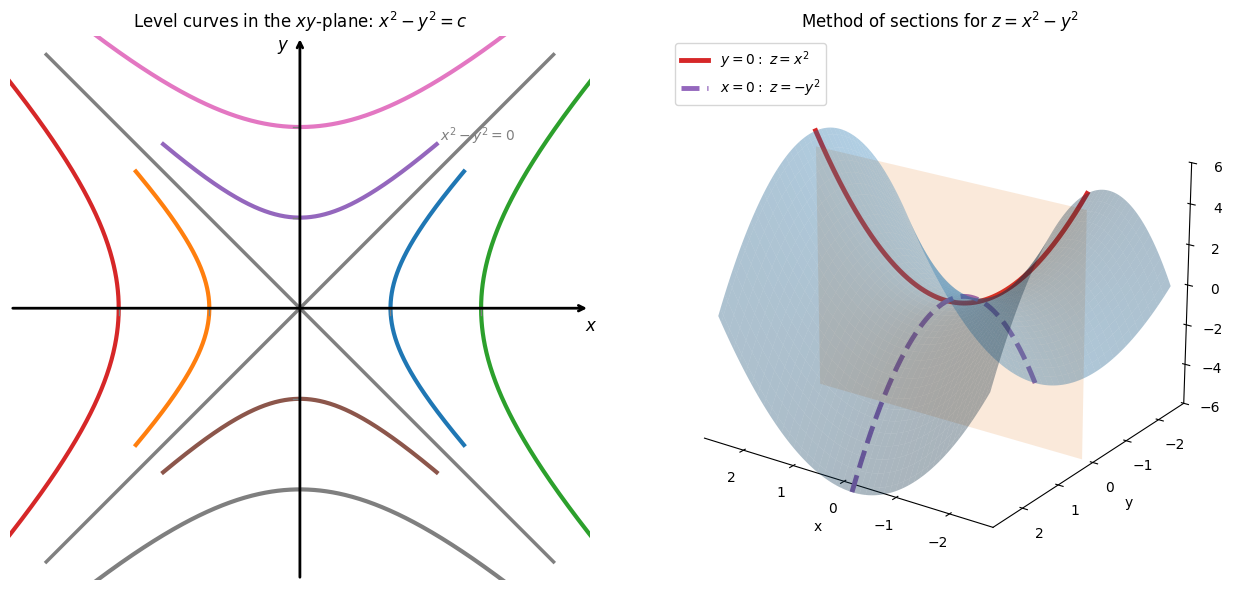

In [ ]:
# Matplotlib version (2-panel: 2D contours + 3D method of sections)
# If you're in Colab and get a 3D backend warning, that's OK—this will still render.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ------------------------------------------------------------
# Helpers: level curves for x^2 - y^2 = c using cosh/sinh
# ------------------------------------------------------------
def hyperbola_branches(c, t):
    """
    Return branches (x,y) for the level curve x^2 - y^2 = c.
    Uses cosh/sinh parameterizations (as in the TikZ code).
    """
    if c > 0:
        a = np.sqrt(c)
        x1 = a*np.cosh(t); y1 = a*np.sinh(t)
        x2 = -a*np.cosh(t); y2 = a*np.sinh(t)
        return [(x1, y1), (x2, y2)]
    elif c < 0:
        a = np.sqrt(-c)
        x  = a*np.sinh(t)
        y1 = a*np.cosh(t)
        y2 = -a*np.cosh(t)
        return [(x, y1), (x, y2)]
    else:
        # c=0 handled separately as y=±x
        return []

# ------------------------------------------------------------
# Figure layout: left (2D), right (3D)
# ------------------------------------------------------------
fig = plt.figure(figsize=(13, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1.0, 1.15])

# ============================================================
# LEFT PANEL (2D): contour map / level curves
# ============================================================
ax2d = fig.add_subplot(gs[0, 0])

# axes with arrows (book-ish)
ax2d.annotate("", xy=(3.2, 0), xytext=(-3.2, 0),
              arrowprops=dict(arrowstyle="->", lw=2))
ax2d.annotate("", xy=(0, 3.0), xytext=(0, -3.0),
              arrowprops=dict(arrowstyle="->", lw=2))
ax2d.text(3.15, -0.25, r"$x$", fontsize=12)
ax2d.text(-0.25, 2.85, r"$y$", fontsize=12)

# c=0 lines: y=±x
xx = np.linspace(-2.8, 2.8, 2)
ax2d.plot(xx,  xx, lw=2.5, color="gray")
ax2d.plot(xx, -xx, lw=2.5, color="gray")
ax2d.text(1.55, 1.85, r"$x^2-y^2=0$", fontsize=10, color="gray")

# hyperbolas for selected c
t = np.linspace(-1.2, 1.2, 500)
levels = [1, 4, -1, -4]
for c in levels:
    branches = hyperbola_branches(c, t)
    for (x, y) in branches:
        ax2d.plot(x, y, lw=3)

# ticks (small marks)
for tck in [-2, -1, 1, 2]:
    ax2d.plot([tck, tck], [0, -0.08], color="gray", lw=1)
    ax2d.plot([0, -0.08], [tck, tck], color="gray", lw=1)

# formatting
ax2d.set_xlim(-3.2, 3.2)
ax2d.set_ylim(-3.0, 3.0)
ax2d.set_aspect("equal", adjustable="box")
ax2d.axis("off")
ax2d.set_title(r"Level curves in the $xy$-plane: $x^2-y^2=c$", fontsize=12)

# ============================================================
# RIGHT PANEL (3D): method of sections for z = x^2 - y^2
# ============================================================
ax3d = fig.add_subplot(gs[0, 1], projection="3d")

# surface z = x^2 - y^2 on a bounded domain
x = np.linspace(-2.6, 2.6, 90)
y = np.linspace(-2.6, 2.6, 90)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

ax3d.plot_surface(X, Y, Z, alpha=0.35, linewidth=0, antialiased=True)

# vertical plane y=0 (xz-plane)
zmin, zmax = -6, 6
Xp = np.array([[-2.6, 2.6], [-2.6, 2.6]])
Yp = np.zeros_like(Xp)
Zp = np.array([[zmin, zmin], [zmax, zmax]])
ax3d.plot_surface(Xp, Yp, Zp, alpha=0.15, linewidth=0)

# vertical plane x=0 (yz-plane)
Xq = np.zeros_like(Xp)
Yq = np.array([[-2.6, -2.6], [2.6, 2.6]])
Zq = Zp.copy()
ax3d.plot_surface(Xq, Yq, Zq, alpha=0.10, linewidth=0)

# section curve in y=0: z=x^2
xs = np.linspace(-2.6, 2.6, 500)
ax3d.plot(xs, 0*xs, xs**2, lw=3.5, label=r"$y=0:\ z=x^2$")

# section curve in x=0: z=-y^2
ys = np.linspace(-2.6, 2.6, 500)
ax3d.plot(0*ys, ys, -(ys**2), lw=3.5, linestyle="--", label=r"$x=0:\ z=-y^2$")

# axes labels + limits
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("z")
ax3d.set_xlim(-2.8, 2.8)
ax3d.set_ylim(-2.8, 2.8)
ax3d.set_zlim(-6, 6)

# camera angle (book-like)
ax3d.view_init(elev=22, azim=125)

# reduce grid clutter (optional)
ax3d.grid(False)
ax3d.xaxis.pane.set_alpha(0.0)
ax3d.yaxis.pane.set_alpha(0.0)
ax3d.zaxis.pane.set_alpha(0.0)

ax3d.set_title(r"Method of sections for $z=x^2-y^2$", fontsize=12)
ax3d.legend(loc="upper left")

plt.tight_layout()
plt.show()


# **Cross-sections in the $(r,z)$-Plane for $x^2+y^2-z^2=c$**


## **Mathematics Behind the Plot**

Consider the family of level surfaces in $\mathbb{R}^3$:

$$
x^2+y^2-z^2=c,\qquad c\in\mathbb{R}.
$$

Introduce the cylindrical radius

$$
r=\sqrt{x^2+y^2}\ \ \ge 0.
$$

Then the equation becomes the 2D relation in the \((r,z)\)-plane:

$$
r^2 - z^2 = c.
$$

So the 3D geometry of $x^2+y^2-z^2=c$ can be understood by first studying its **cross-section curve**

$$
\Gamma_c:=\{(r,z)\in\mathbb{R}^2:\ r\ge 0,\ r^2-z^2=c\},
$$

and then **revolving** this curve about the \(z\)-axis (because \(r\) represents distance from the \(z\)-axis).

### Classification

- **Case $c=0$**:
  $$
  r^2-z^2=0 \iff r=|z|.
  $$
  In $(r,z)$, this is two rays $r=z$ and $r=-z$ for $r\ge 0$.  
  Revolving gives a **double cone**.

- **Case $c>0$** (e.g. $c=1$ ):
  $$
  r^2-z^2=1 \iff r=\sqrt{z^2+1}.
  $$
  This is a single connected curve (for all $z\in\mathbb{R}$).  
  Revolving gives a **one-sheet hyperboloid**.

- **Case $c<0$** (e.g. $c=-1$):
  $$
  r^2-z^2=-1 \iff z^2=r^2+1 \iff z=\pm\sqrt{r^2+1}.
  $$
  This splits into two branches, with $|z|\ge 1$.  
  Revolving gives a **two-sheet hyperboloid**.

That is exactly what the picture draws:  
- the cone rays for $c=0$,
- the curve $r=\sqrt{z^2+1}$ for $c=1$,
- and $z=\pm\sqrt{r^2+1}$ for $c=-1$.

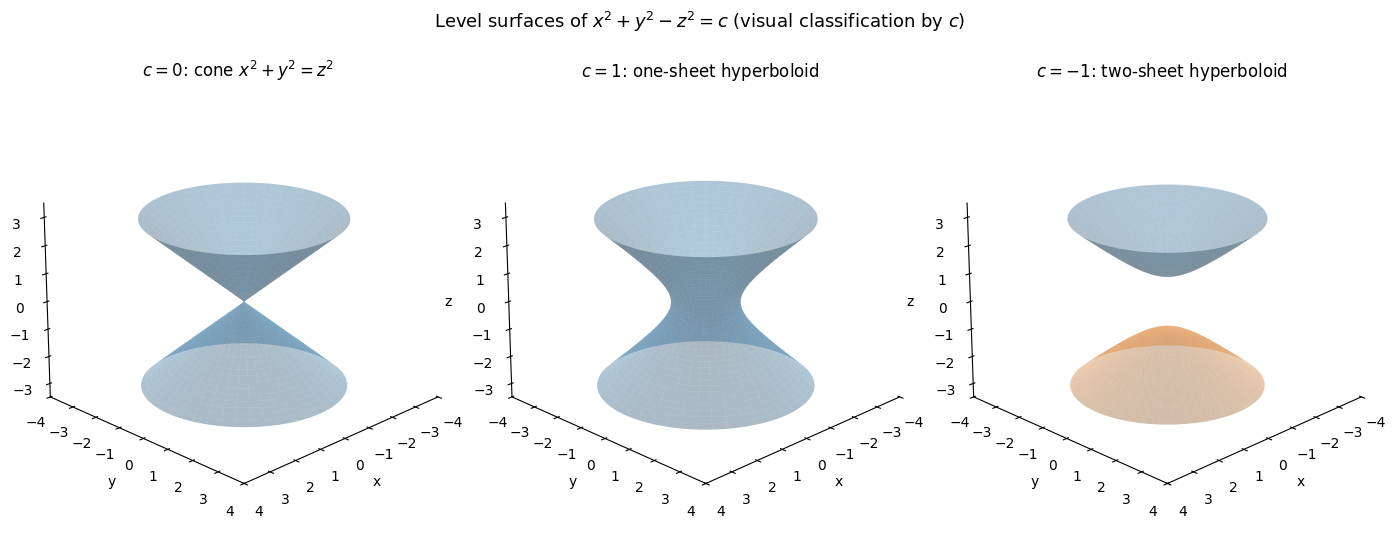

In [ ]:
# Matplotlib (3D) — three separate subplots in ONE figure:
# (1) c=0 cone, (2) c=1 one-sheet hyperboloid, (3) c=-1 two-sheet hyperboloid
#
# This is a fresh, clean code: readable, visible, and with no overlapping annotations.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# -----------------------------
# Cylindrical parametrizations
# -----------------------------
theta = np.linspace(0, 2*np.pi, 180)

def surface_c_equals_0_cone(zmin=-3, zmax=3, nz=160):
    z = np.linspace(zmin, zmax, nz)
    TH, Z = np.meshgrid(theta, z)
    R = np.abs(Z)                      # r = |z|
    X = R*np.cos(TH)
    Y = R*np.sin(TH)
    return X, Y, Z

def surface_c_equals_1_one_sheet(zmin=-3, zmax=3, nz=160):
    z = np.linspace(zmin, zmax, nz)
    TH, Z = np.meshgrid(theta, z)
    R = np.sqrt(Z**2 + 1.0)            # r^2 = z^2 + 1
    X = R*np.cos(TH)
    Y = R*np.sin(TH)
    return X, Y, Z

def surface_c_equals_minus1_two_sheet(zmin=1, zmax=3, nz=140):
    # Two sheets: |z| >= 1
    z_top = np.linspace(zmin, zmax, nz)
    z_bot = -z_top[::-1]
    THt, Zt = np.meshgrid(theta, z_top)
    THb, Zb = np.meshgrid(theta, z_bot)
    Rt = np.sqrt(Zt**2 - 1.0)          # r^2 = z^2 - 1
    Rb = np.sqrt(Zb**2 - 1.0)
    Xt, Yt = Rt*np.cos(THt), Rt*np.sin(THt)
    Xb, Yb = Rb*np.cos(THb), Rb*np.sin(THb)
    return (Xt, Yt, Zt), (Xb, Yb, Zb)

# -----------------------------
# Styling helper for "book-like" look
# -----------------------------
def stylize_axis(ax, title):
    ax.set_title(title, pad=10)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-3.5, 3.5)
    ax.view_init(elev=22, azim=45)

    # Reduce clutter
    ax.grid(False)
    ax.xaxis.pane.set_alpha(0.0)
    ax.yaxis.pane.set_alpha(0.0)
    ax.zaxis.pane.set_alpha(0.0)

# -----------------------------
# Build figure with 3 panels
# -----------------------------
fig = plt.figure(figsize=(14, 5.4))

# (1) c=0 cone
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
X, Y, Z = surface_c_equals_0_cone()
ax1.plot_surface(X, Y, Z, alpha=0.35, linewidth=0, antialiased=True)
stylize_axis(ax1, r"$c=0$: cone $x^2+y^2=z^2$")

# (2) c=1 one-sheet hyperboloid
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
X, Y, Z = surface_c_equals_1_one_sheet()
ax2.plot_surface(X, Y, Z, alpha=0.35, linewidth=0, antialiased=True)
stylize_axis(ax2, r"$c=1$: one-sheet hyperboloid")

# (3) c=-1 two-sheet hyperboloid
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
(topX, topY, topZ), (botX, botY, botZ) = surface_c_equals_minus1_two_sheet()
ax3.plot_surface(topX, topY, topZ, alpha=0.35, linewidth=0, antialiased=True)
ax3.plot_surface(botX, botY, botZ, alpha=0.35, linewidth=0, antialiased=True)
stylize_axis(ax3, r"$c=-1$: two-sheet hyperboloid")

# Overall title
fig.suptitle(r"Level surfaces of $x^2+y^2-z^2=c$ (visual classification by $c$)", fontsize=13, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## **How We Model it in Python**

We plot in the $(r,z)$-plane:
- Axes $r$ (horizontal), $z$ (vertical),
- Curves defined by explicit formulas:
  - cone: $z=\pm r$,
  - one-sheet: $r=\sqrt{z^2+1}$,
  - two-sheet: $z=\pm\sqrt{r^2+1}$,
- Small tick marks on axes like the book.

## **Interpretation (Geometric Meaning in 3D)**

The curves are drawn in the $(r,z)$-plane.  
When we **revolve** each curve around the $z$-axis, we reconstruct the 3D level surface:

- $c=0$: $r=|z|$ → **Cone** $x^2+y^2=z^2$.
- $c>0$: $r=\sqrt{z^2+c}$ → **One-sheet Hyperboloid**.
- $c<0$: $z=\pm\sqrt{r^2+|c|}$ → **Two-sheet Hyperboloid**.

> So the 2D picture is the standard “radial cross-section” method for surfaces of revolution.


> **Problem:** $y=0$ of $\mathrm{graph}(f)\subset\mathbb{R}^4$ for $f(x,y,z)=x^2+y^2-z^2$

## **1. Mathematics Behind the Diagram**

### 1.1 Graph in $\mathbb{R}^4$
Let

$$
f:\mathbb{R}^3\to\mathbb{R},\qquad f(x,y,z)=x^2+y^2-z^2.
$$

Its graph is a subset of $\mathbb{R}^4$:

$$
\mathrm{graph}(f)=\{(x,y,z,t)\in\mathbb{R}^4:\ t=f(x,y,z)\}.
$$

### **1.2 Taking the Section  $y=0$**
Intersect $\mathrm{graph}(f)$ with the hyperplane $y=0$.Define the sliced function

$$
g(x,z)=f(x,0,z)=x^2-z^2.
$$

Thus the section is the 3D graph in $(x,z,t)$-space:

$$
t=g(x,z)=x^2-z^2.
$$

This surface is a **hyperbolic paraboloid** (saddle).

### **1.3 The “Level Curves” Drawn on the Surface**
The figure draws the intersections with the horizontal planes $t=1$ and $t=-1$.

- For $t=1$:

$$
x^2-z^2=1,
$$

a hyperbola in the $(x,z)$-plane, lifted to height $t=1$. A standard parametrization is

$$
x=\pm\cosh(s),\qquad z=\sinh(s),\qquad s\in\mathbb{R}.
$$

- For $t=-1$:

$$
x^2-z^2=-1 \iff z^2-x^2=1,
$$

also a hyperbola, lifted to height $t=-1$. A parametrization is

$$
x=\sinh(s),\qquad z=\pm\cosh(s),\qquad s\in\mathbb{R}.
$$

So the diagram shows:
1) The saddle surface $t=x^2-z^2$ (wireframe),
2) Two horizontal slice curves at $t=\pm 1$,
3) Axes and clean labels with leader lines.

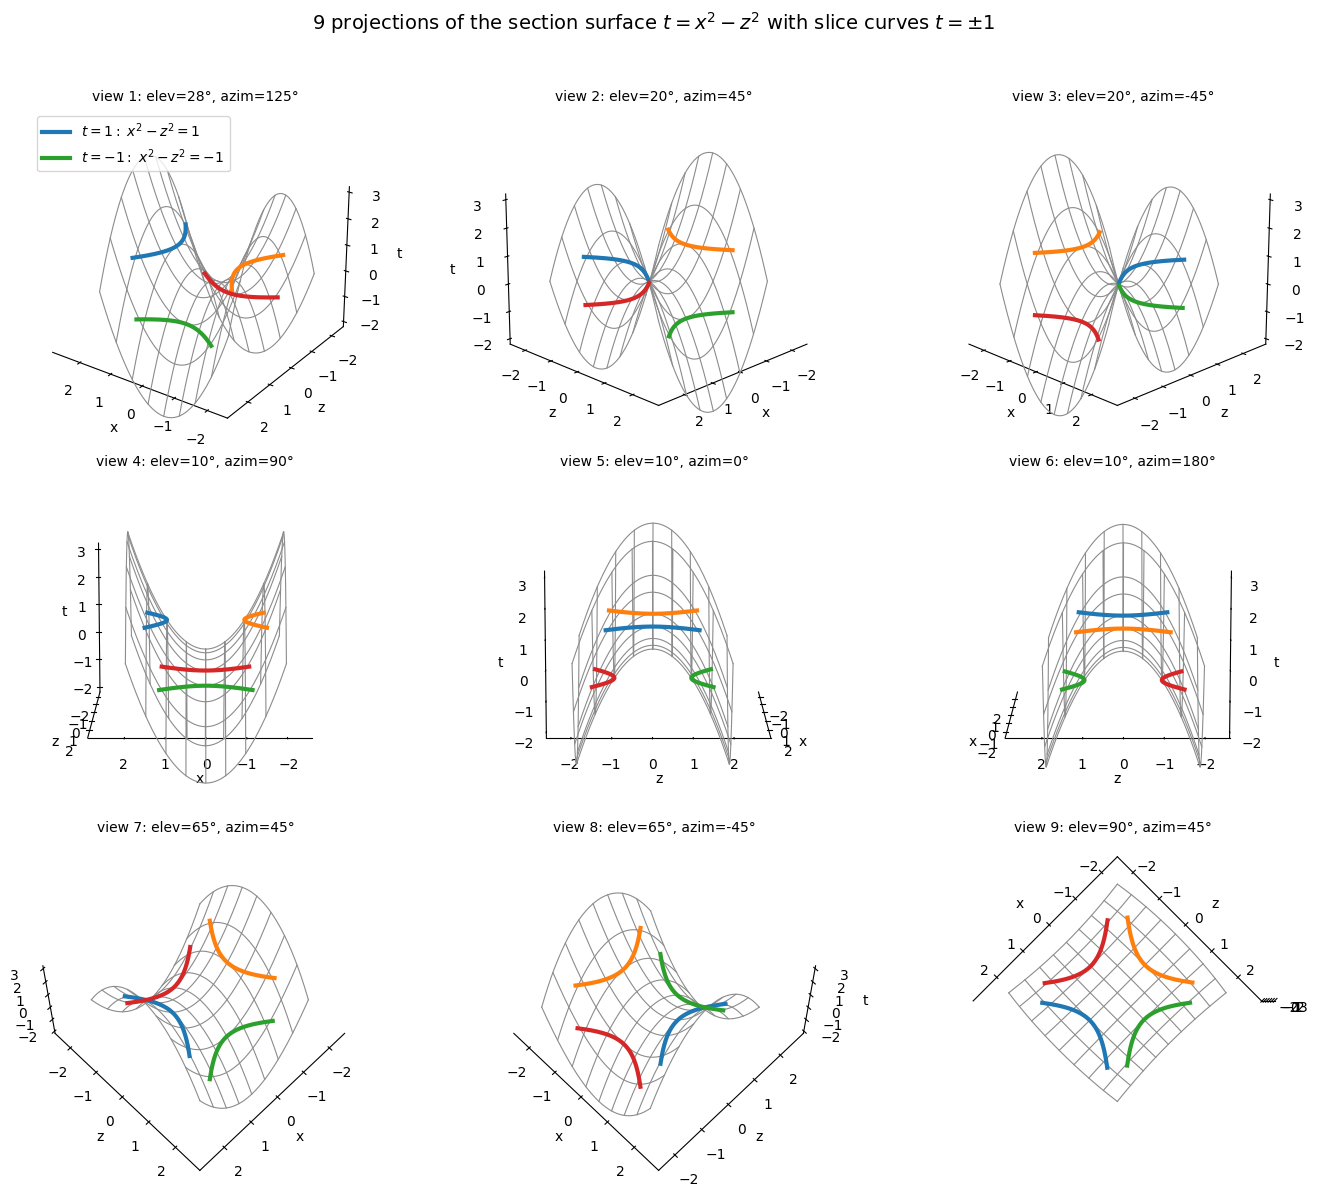

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ============================================================
# Data for the surface t = x^2 - z^2 and slice curves t = ±1
# Coordinates mapping: (x, z, t) -> Matplotlib (X, Y, Z)
# ============================================================

# Domain
x_min, x_max = -2.0, 2.0
z_min, z_max = -2.0, 2.0

# Wireframe lines
grid_vals = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
z_line = np.linspace(z_min, z_max, 240)
x_line = np.linspace(x_min, x_max, 240)

# Slice curves parameter (hyperbola parametrizations)
s = np.linspace(-1.0, 1.0, 300)

# t=1: x=±cosh(s), z=sinh(s)
x1p, z1, t1 = np.cosh(s), np.sinh(s), np.ones_like(s)
x1m = -np.cosh(s)

# t=-1: x=sinh(s), z=±cosh(s)
x2, z2p, t2 = np.sinh(s), np.cosh(s), -np.ones_like(s)
z2m = -np.cosh(s)

# ------------------------------------------------------------
# Helper to draw the same diagram on a given Axes3D
# ------------------------------------------------------------
def draw_scene(ax, show_legend=False):
    # Limits (similar to your original)
    ax.set_xlim(-2.6, 2.9)
    ax.set_ylim(-2.6, 2.9)
    ax.set_zlim(-2.2, 3.2)

    # Labels
    ax.set_xlabel("x", labelpad=2)
    ax.set_ylabel("z", labelpad=2)
    ax.set_zlabel("t", labelpad=2)

    # Wireframe: x fixed, z varies
    for a in grid_vals:
        zz = z_line
        xx = np.full_like(zz, a)
        tt = xx**2 - zz**2
        ax.plot(xx, zz, tt, color="0.55", linewidth=0.8)

    # Wireframe: z fixed, x varies
    for b in grid_vals:
        xx = x_line
        zz = np.full_like(xx, b)
        tt = xx**2 - zz**2
        ax.plot(xx, zz, tt, color="0.55", linewidth=0.8)

    # Slice curves
    ax.plot(x1p, z1, t1, linewidth=3.0, label=r"$t=1:\ x^2-z^2=1$")
    ax.plot(x1m, z1, t1, linewidth=3.0)

    ax.plot(x2, z2p, t2, linewidth=3.0, label=r"$t=-1:\ x^2-z^2=-1$")
    ax.plot(x2, z2m, t2, linewidth=3.0)

    # Minimal ticks (optional): keep axes clean
    ax.set_xticks([-2, -1, 0, 1, 2])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_zticks([-2, -1, 0, 1, 2, 3])

    # Reduce clutter
    ax.grid(False)
    ax.xaxis.pane.set_alpha(0.0)
    ax.yaxis.pane.set_alpha(0.0)
    ax.zaxis.pane.set_alpha(0.0)

    if show_legend:
        ax.legend(loc="upper left")

# ------------------------------------------------------------
# 9 best views: (elev, azim)
# Chosen to show: oblique, side, front/back, and upper/top-like.
# ------------------------------------------------------------
views = [
    (28, 125),  # your original-ish
    (20,  45),  # classic oblique (clear saddle)
    (20, -45),  # opposite oblique
    (10,  90),  # side view (emphasize x vs t)
    (10,   0),  # front view
    (10, 180),  # back view
    (65,  45),  # high angle (near top)
    (65, -45),  # high angle opposite
    (90,  45),  # top-down (projection-like)
]

# ------------------------------------------------------------
# Plot 3x3 grid
# ------------------------------------------------------------
fig = plt.figure(figsize=(14.5, 12))
for i, (elev, azim) in enumerate(views, start=1):
    ax = fig.add_subplot(3, 3, i, projection="3d")
    draw_scene(ax, show_legend=(i == 1))
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"view {i}: elev={elev}°, azim={azim}°", pad=6, fontsize=10)

fig.suptitle(
    r"9 projections of the section surface $t=x^2-z^2$ with slice curves $t=\pm 1$",
    fontsize=14, y=0.98
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## **2. Python Algorithm (What We Implement)**

**Step A (wireframe mesh).**  
Choose a grid of $x$ and $z$ values (e.g. $[-2,2]\times[-2,2]$), compute

$$
t=x^2-z^2,
$$

and draw mesh lines in two families:
- lines with $x$ fixed, varying $z$,
- lines with $z$ fixed, varying $x$.

**Step B (slice curves).**  
Choose parameter values $s\in[-1,1]$ and compute:
- for $t=1$: $(x,z,t)= (\pm\cosh s,\sinh s,1)$,
- for $t=-1$: $(x,z,t)=(\sinh s,\pm\cosh s,-1)$.

**Step C (labels).**
- **In Matplotlib:** Prefer a legend or a few `ax.text` placed away from the surface.
- **In Plotly:** Use **paper-coordinate annotations** to avoid overlapping with 3D geometry.


## **3. Projection Viewpoint (What Each “Camera Angle” is Teaching)**

In our picture the surface is

$$
S=\{(x,z,t)\in\mathbb{R}^3:\ t=x^2-z^2\},
$$

and the two highlighted slice curves are

$$
C_{+1}=S\cap\{t=1\},\qquad C_{-1}=S\cap\{t=-1\}.
$$

> A 3D plot is *not* the object itself; it is a **projection of the object to your screen** after a change of coordinates determined by the camera.

### **3.1) The Mathematical Model of “Viewing” a Surface**
A viewing direction is encoded by a rotation (and a translation) of $\mathbb{R}^3$. Concretely, for each camera setting $(\text{elev},\text{azim})$, Matplotlib applies a transformation

$$
(x,z,t)\ \mapsto\ (x',z',t')
$$

where $(x',z',t')$ are the coordinates after rotating the axes. Then it draws the 2D picture by keeping only two coordinates (screen coordinates):

$$
\Pi(x',z',t')=(u,v)\in\mathbb{R}^2.
$$
So every panel in the 3×3 grid is a different composition

$$
\Pi\circ R_{\text{camera}}:\ \mathbb{R}^3\to\mathbb{R}^2.
$$


> **Key idea:** Different camera angles correspond to different projections of the same geometric object.

### **3.2) Why Multiple Projections Help Understanding**
A single projection can hide important structure (self-overlap, depth ambiguity, or misleading “flatness”). By showing **many** projections, we recover the geometry more reliably—just like technical drawing in engineering uses *front / side / top* views.

For the saddle surface $t=x^2-z^2$, projections are especially useful because:

- Along the line \(z=0\), the surface cross-section is
  $$
  t=x^2 \quad(\text{opens upward}).
  $$
- Along the line \(x=0\), the surface cross-section is
  $$
  t=-z^2 \quad(\text{opens downward}).
  $$
Opposite curvatures are the signature of a **saddle**.  
Certain camera angles show one curvature clearly but hide the other—so we need multiple views.


### **3.3) What the Top-Down (“Projection”) View Means**
When we set a “top” view (high elevation close to $90^\circ$), the screen is almost the $(x,z)$-plane, and we are essentially seeing the **projection**
$$
\pi_{xz}: (x,z,t)\mapsto (x,z).
$$
Under this projection:

- The surface $S$ collapses to its domain $\mathbb{R}^2 \in (x,z)$.
- The slice curve $C_c=S\cap\{t=c\}$ projects to
  $$
  \pi_{xz}(C_c)=\{(x,z): x^2-z^2=c\},
  $$
  which is the *hyperbola* drawn in the domain plane.

> So, a top view connects the 3D geometry back to the 2D equation $x^2-z^2=c$.

### **3.4) Programming Perspective: Why We Generated 9 Views**
In code, each subplot corresponds to changing only:
```python
ax.view_init(elev=elev, azim=azim)
```

Everything else stays fixed (same data, same surface, same curves).This is a computational version of a mathematical principle:

> **Invariance Under Rigid Motions:** The object $S$ is the same; only the observer coordinate system changes.

Because Matplotlib is perspective by default, depth can be ambiguous in one view. Nine views reduce ambiguity by showing:

- Oblique views (depth + both curvatures),

- Side/front views (one curvature emphasized),

- High/top views (projection to the
$(x,z)$-plane).

## **4. How to “read” The Slice Curves $t=\pm 1$ From Any Projection**

The thick curves in the 3D plot are **intersections with horizontal planes**:

$$
t=1 \;\Longrightarrow\; x^2-z^2=1,
\qquad
t=-1 \;\Longrightarrow\; x^2-z^2=-1.
$$

### **4.1 Geometrical Meaning**
- The curve $t=1$ lies **on the surface** $t=x^2-z^2$ at **height** $t=1$.
- The curve $t=-1$ lies **on the surface** at **height** $t=-1$.

### **4.2 How the Camera View Affects What You Can See**
A projection (camera angle) can visually compress depth, so sometimes the two heights $t=1$ and $t=-1$ are hard to distinguish.

- If the goal is to distinguish **heights** (which curve is higher/lower), rotate to a view where the **$t$-axis is clearly visible** (oblique or side views).
- If the goal is to recognize the **equations** of the curves, rotate to a view close to the $(x,z)$-plane (top view), where the intersection condition becomes visually close to the 2D set
  $$
  x^2-z^2=c.
  $$

## **5. Takeaway**

A 3D figure is best understood as a **family of 2D projections**.

For a saddle surface like $t=x^2-z^2$, multiple projections are the cleanest way to communicate:

- The **global shape** (saddle),
- The **slicing geometry** (intersection with planes $t=c$),
- The relation between the **3D geometry** and the **2D algebraic sets**

  $$
  x^2-z^2=c.
  $$

In [ ]:
# ============================================================
# 2) PLOTLY VERSION (wireframe + slice curves + non-overlapping annotations)
# ============================================================

# If needed in Colab:
# !pip -q install plotly

import numpy as np
import plotly.graph_objects as go

# Wireframe params
grid_vals = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
x_line = np.linspace(-2, 2, 220)
z_line = np.linspace(-2, 2, 220)

# Slice curve params
s = np.linspace(-1.0, 1.0, 280)

# t=1 hyperbola: x=±cosh(s), z=sinh(s)
x1p, z1, t1 = np.cosh(s), np.sinh(s), np.ones_like(s)
x1m = -np.cosh(s)

# t=-1 hyperbola: x=sinh(s), z=±cosh(s)
x2, z2p, t2 = np.sinh(s), np.cosh(s), -np.ones_like(s)
z2m = -np.cosh(s)

fig = go.Figure()

# --- Wireframe: x fixed ---
for a in grid_vals:
    zz = z_line
    xx = np.full_like(zz, a)
    tt = xx**2 - zz**2
    fig.add_trace(go.Scatter3d(
        x=xx, y=zz, z=tt,
        mode="lines",
        line=dict(width=2, color="rgba(120,120,120,0.65)"),
        showlegend=False,
        hoverinfo="skip"
    ))

# --- Wireframe: z fixed ---
for b in grid_vals:
    xx = x_line
    zz = np.full_like(xx, b)
    tt = xx**2 - zz**2
    fig.add_trace(go.Scatter3d(
        x=xx, y=zz, z=tt,
        mode="lines",
        line=dict(width=2, color="rgba(120,120,120,0.65)"),
        showlegend=False,
        hoverinfo="skip"
    ))

# --- Slice curves (thick, readable) ---
fig.add_trace(go.Scatter3d(
    x=x1p, y=z1, z=t1,
    mode="lines",
    line=dict(width=8),
    name="t=1: x^2 - z^2 = 1",
    hovertemplate="t=1 slice<br>x^2 - z^2 = 1<extra></extra>"
))
fig.add_trace(go.Scatter3d(
    x=x1m, y=z1, z=t1,
    mode="lines",
    line=dict(width=8),
    showlegend=False,
    hovertemplate="t=1 slice<br>x^2 - z^2 = 1<extra></extra>"
))

fig.add_trace(go.Scatter3d(
    x=x2, y=z2p, z=t2,
    mode="lines",
    line=dict(width=8, dash="solid"),
    name="t=-1: x^2 - z^2 = -1",
    hovertemplate="t=-1 slice<br>x^2 - z^2 = -1<extra></extra>"
))
fig.add_trace(go.Scatter3d(
    x=x2, y=z2m, z=t2,
    mode="lines",
    line=dict(width=8, dash="solid"),
    showlegend=False,
    hovertemplate="t=-1 slice<br>x^2 - z^2 = -1<extra></extra>"
))

# --- Non-overlapping annotations in PAPER coords (never intersects geometry) ---
fig.add_annotation(
    x=0.02, y=0.98, xref="paper", yref="paper",
    text=r"$y=0\Rightarrow t=x^2-z^2$",
    showarrow=False, font=dict(size=14)
)
fig.add_annotation(
    x=0.02, y=0.93, xref="paper", yref="paper",
    text="Blue curves are horizontal slices:  t = 1  and  t = -1",
    showarrow=False, font=dict(size=12)
)

fig.update_layout(
    title="Section y=0 of graph(f): 3D wireframe of  t = x^2 - z^2  with slices t = ±1",
    width=980, height=720,
    margin=dict(l=10, r=10, t=80, b=10),
    paper_bgcolor="white",
    legend=dict(
        bgcolor="rgba(255,255,255,0.7)",
        x=0.02, y=0.85
    ),
    scene=dict(
        xaxis=dict(title="x", range=[-2.6, 2.9], showbackground=False, showgrid=False, zeroline=False),
        yaxis=dict(title="z", range=[-2.6, 2.9], showbackground=False, showgrid=False, zeroline=False),
        zaxis=dict(title="t", range=[-2.2, 3.2], showbackground=False, showgrid=False, zeroline=False),
        aspectmode="manual",
        aspectratio=dict(x=1.1, y=1.1, z=0.9),
        camera=dict(eye=dict(x=1.45, y=1.15, z=0.9))
    )
)

fig.show()


## **What Should Notice (Reading the Figure)**

- The gray wireframe is the surface $t=x^2-z^2$.
- The thick curves at constant heights $t=1$ and $t=-1$ are **hyperbolas** on the surface:
  $$
  t=1 \iff x^2-z^2=1,\qquad t=-1 \iff x^2-z^2=-1.
  $$
- The surface is a saddle because:
  - along $z=0$, $t=x^2$ opens upward,
  - along $x=0$, $t=-z^2$ opens downward.

# **Conclusion**

In this module we developed a unified geometric understanding of real-valued functions by linking algebraic definitions, set-theoretic constructions, and visualization. We emphasized that every rendered 3D image is a projection depending on the camera view; therefore, multiple viewpoints (oblique, side, and top-down) are essential for correctly reading height, curvature, and slicing geometry. Altogether, the theory and visuals form a single coherent pipeline: function $\Rightarrow$ graph $\Rightarrow$ slices/level sets $\Rightarrow$ rigorous geometric interpretation .